# Introduction to Geospatial Analysis

J.E.J. Gonzales

In this notebook, we will explore how to utilize `geopandas` for simple map data visualizations and distance-based calculations. The notebook would also provide ways to collect points of interest data using `OSMNX`.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely import wkt
from shapely.geometry import Point, Polygon
import osmnx as ox
import pyproj
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
# !pip install geopandas
# !pip install osmnx
# !python -m pip uninstall matplotlib
# !pip install matplotlib==3.1.3
# !pip install networkx
# !pip install decorator==5.0.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 3.8 MB/s 
     |████████████████████████████████| 16.7 MB 17.4 MB/s 
     |████████████████████████████████| 6.3 MB 31.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.5 MB/s 
     |████████████████████████████████| 11.2 MB 142 kB/s 
     |████████████████████████████████| 1.0 MB 36.7 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 957 kB 51.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 4.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
moviepy 0.2.3.5 requires decorator<5.0,>=4.0.2, but you have decorator 5.0.9 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Collecting Geospatial Data from OSMNX

In order to download geospatial data from Open Street Maps, we would be using the `geocoder` and the `geometries` function of the `OSMNX` library.

We can query the `longitude` (x-coordinate) and the `latitude` (y-coordinate) of the Ateneo de Manila University using the `geocode` method of `geocoder`.

In [2]:
ateneo = ox.geocoder.geocode(query='Ateneo de Manila University')
ateneo

# query = {
#     'boundary': 'administrative',
#     'admin_level': 10,
#     'name': '659'
# }

# brgy659 = ox.geocoder.geocode(query=query)
# brgy659

(14.63989835, 121.07819518938447)

We can get the corresponding `shapefile` (or the geospatial representation) of Ateneo using the `geocode_to_gdf` method of `geocoder`.

For cases when we have multiple results for the query, we can set `which_result=1` to get the closest query.

In [4]:
ateneo_shp = ox.geocoder.geocode_to_gdf(query='Ateneo de Manila University',
                                        which_result=1)
ateneo_shp

# brgy659_shp = ox.geocoder.geocode_to_gdf(query=query,
#                                         which_result=1)
# brgy659_shp

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((121.07452 14.63459, 121.07544 14.634...",14.647041,14.632704,121.083198,121.074522,138021181,way,138294127,14.639898,121.078195,"Ateneo de Manila University, Katipunan Avenue,...",amenity,university,0.883628


In [5]:
type(ateneo_shp)

geopandas.geodataframe.GeoDataFrame

We can visualize the map of Ateneo by calling the plot method of the GeoDataFrame.

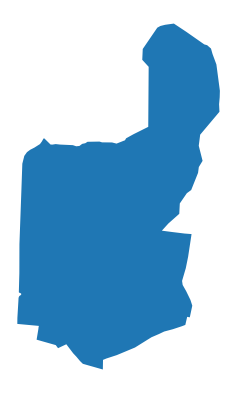

In [6]:
ateneo_shp.plot(figsize=(10,7))
plt.axis('off')
plt.show()

# brgy659_shp.plot(figsize=(10,7))
# plt.axis('off')
# plt.show()

We can also visualize the amenities that are within 200 meters from the Ateneo's centroid (which is at 14.64 degrees latitude, 121.07 degrees longitude) by using the `geometries_from_point` method of the `geometries` function.

In [8]:
amenities_admu = ox.geometries.geometries_from_address(
    address='Ateneo de Manila University',
    tags = {'amenity':True},
    dist=400)

amenities_admu

access  \
element_type osmid              
node         273557856    NaN   
             273557865    NaN   
             273557888    NaN   
             281021045    NaN   
             281021762    NaN   
...                       ...   
way          912616554    NaN   
             912617387    NaN   
             912617389    NaN   
             984179993    NaN   
relation     3812734      NaN   

                                                                 geometry  \
element_type osmid                                                          
node         273557856                         POINT (121.07938 14.64109)   
             273557865                         POINT (121.07592 14.64048)   
             273557888                         POINT (121.07884 14.63647)   
             281021045                         POINT (121.07650 14.63773)   
             281021762                         POINT (121.07730 14.63965)   
...                                                                   ...   
way          912616554  POLYGON ((121.07877 14.64320, 121.07881 14.643...   
             912617387  POLYGON ((121.07841 14.64305, 121.07869 14.643...   
             912617389  POLYGON ((121.07617 14.64252, 121.07606 14.642...   
             984179993  POLYGON ((121.08017 14.64230, 121.08049 14.642...   
relation     3812734    POLYGON ((121.08063 14.63934, 121.08063 14.639...   

                           amenity          name name:en addr:city  \
element_type osmid                                                   
node         273557856     parking           NaN     NaN       NaN   
             273557865     parking           NaN     NaN       NaN   
             273557888     parking           NaN     NaN       NaN   
             281021045  restaurant          JSEC    JSEC       NaN   
             281021762        cafe           NaN     NaN       NaN   
...                            ...           ...     ...       ...   
way          912616554     parking           NaN     NaN       NaN   
             912617387     parking           NaN     NaN       NaN   
             912617389     parking           NaN     NaN       NaN   
             984179993     parking           NaN     NaN       NaN   
relation     3812734    university  Cervini Hall     NaN       NaN   

                       addr:postcode addr:street level capacity  ...  \
element_type osmid                                               ...   
node         273557856           NaN         NaN   NaN      NaN  ...   
             273557865           NaN         NaN   NaN      NaN  ...   
             273557888           NaN         NaN   NaN      NaN  ...   
             281021045           NaN         NaN   NaN      NaN  ...   
             281021762           NaN         NaN   NaN      NaN  ...   
...                              ...         ...   ...      ...  ...   
way          912616554           NaN         NaN   NaN      NaN  ...   
             912617387           NaN         NaN   NaN      NaN  ...   
             912617389           NaN         NaN   NaN      NaN  ...   
             984179993           NaN         NaN   NaN      NaN  ...   
relation     3812734             NaN         NaN   NaN      NaN  ...   

                       previously website parking source layer healthcare  \
element_type osmid                                                          
node         273557856        NaN     NaN     NaN    NaN   NaN        NaN   
             273557865        NaN     NaN     NaN    NaN   NaN        NaN   
             273557888        NaN     NaN     NaN    NaN   NaN        NaN   
             281021045        NaN     NaN     NaN    NaN   NaN        NaN   
             281021762        NaN     NaN     NaN    NaN   NaN        NaN   
...                           ...     ...     ...    ...   ...        ...   
way          912616554        NaN     NaN     NaN    NaN   NaN        NaN   
             912617387        NaN     NaN     NaN 

In [9]:
amenities_near_admu = ox.geometries.geometries_from_point(ateneo, 
                                                          tags = {'amenity':True}, 
                                                          dist=400)
amenities_near_admu

access  \
element_type osmid              
node         273557856    NaN   
             273557865    NaN   
             273557888    NaN   
             281021045    NaN   
             281021762    NaN   
...                       ...   
way          912616554    NaN   
             912617387    NaN   
             912617389    NaN   
             984179993    NaN   
relation     3812734      NaN   

                                                                 geometry  \
element_type osmid                                                          
node         273557856                         POINT (121.07938 14.64109)   
             273557865                         POINT (121.07592 14.64048)   
             273557888                         POINT (121.07884 14.63647)   
             281021045                         POINT (121.07650 14.63773)   
             281021762                         POINT (121.07730 14.63965)   
...                                                                   ...   
way          912616554  POLYGON ((121.07877 14.64320, 121.07881 14.643...   
             912617387  POLYGON ((121.07841 14.64305, 121.07869 14.643...   
             912617389  POLYGON ((121.07617 14.64252, 121.07606 14.642...   
             984179993  POLYGON ((121.08017 14.64230, 121.08049 14.642...   
relation     3812734    POLYGON ((121.08063 14.63934, 121.08063 14.639...   

                           amenity          name name:en addr:city  \
element_type osmid                                                   
node         273557856     parking           NaN     NaN       NaN   
             273557865     parking           NaN     NaN       NaN   
             273557888     parking           NaN     NaN       NaN   
             281021045  restaurant          JSEC    JSEC       NaN   
             281021762        cafe           NaN     NaN       NaN   
...                            ...           ...     ...       ...   
way          912616554     parking           NaN     NaN       NaN   
             912617387     parking           NaN     NaN       NaN   
             912617389     parking           NaN     NaN       NaN   
             984179993     parking           NaN     NaN       NaN   
relation     3812734    university  Cervini Hall     NaN       NaN   

                       addr:postcode addr:street level capacity  ...  \
element_type osmid                                               ...   
node         273557856           NaN         NaN   NaN      NaN  ...   
             273557865           NaN         NaN   NaN      NaN  ...   
             273557888           NaN         NaN   NaN      NaN  ...   
             281021045           NaN         NaN   NaN      NaN  ...   
             281021762           NaN         NaN   NaN      NaN  ...   
...                              ...         ...   ...      ...  ...   
way          912616554           NaN         NaN   NaN      NaN  ...   
             912617387           NaN         NaN   NaN      NaN  ...   
             912617389           NaN         NaN   NaN      NaN  ...   
             984179993           NaN         NaN   NaN      NaN  ...   
relation     3812734             NaN         NaN   NaN      NaN  ...   

                       previously website parking source layer healthcare  \
element_type osmid                                                          
node         273557856        NaN     NaN     NaN    NaN   NaN        NaN   
             273557865        NaN     NaN     NaN    NaN   NaN        NaN   
             273557888        NaN     NaN     NaN    NaN   NaN        NaN   
             281021045        NaN     NaN     NaN    NaN   NaN        NaN   
             281021762        NaN     NaN     NaN    NaN   NaN        NaN   
...                           ...     ...     ...    ...   ...        ...   
way          912616554        NaN     NaN     NaN    NaN   NaN        NaN   
             912617387        NaN     NaN     NaN 

Notice that in the query above, we have found three different geospatial element types -- nodes, ways and relations.

- Nodes represent a specific point on the earth's surface defined by its latitude and longitude. 
- Ways are used to represent lines on geospatial maps (such as roads, rivers). Ways are also used to represent nodes that have more than 1 point. Some ways could also be polygons (or closed figures) that refer to specific amenities.
- Relation serves as a multi-purpose data structure that documents a relationship between two or more data elements.

More about the differences between the three are in this reference: https://wiki.openstreetmap.org/wiki/Elements.

For this case, we are interested to visualize all the `nodes`, or the amenities within the campus.

In [10]:
#warnings.filterwarnings('ignore', category=DeprecationWarning)

amenities_near_admu = amenities_near_admu.reset_index()
ateneo_df = amenities_near_admu[amenities_near_admu['element_type'] == 'node']
ateneo_df

,element_type,osmid,access,geometry,amenity,name,name:en,addr:city,addr:postcode,addr:street,...,previously,website,parking,source,layer,healthcare,shelter_type,surface,ways,type
0,node,273557856,NaN,POINT (121.07938 14.64109),parking,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,273557865,NaN,POINT (121.07592 14.64048),parking,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,273557888,NaN,POINT (121.07884 14.63647),parking,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,281021045,NaN,POINT (121.07650 14.63773),restaurant,JSEC,JSEC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,281021762,NaN,POINT (121.07730 14.63965),cafe,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,node,5762828026,NaN,POINT (121.07709 14.63998),bench,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,node,6026589456,NaN,POINT (121.07819 14.63665),shelter,E-Jeep Waiting Shed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,node,6505585096,NaN,POINT (121.07825 14.63972),vending_machine,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,node,6505585097,NaN,POINT (121.07826 14.63970),waste_basket,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


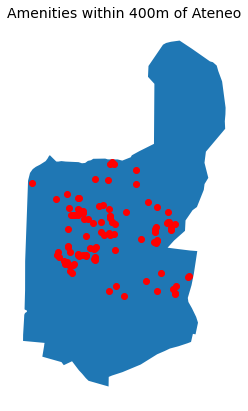

In [11]:
# visualizing
fig, ax = plt.subplots(figsize=(10,7))
ateneo_shp.plot(ax=ax)
ateneo_df.plot(ax=ax, color='red')
ax.axis('off')
ax.set_title('Amenities within 400m of Ateneo', fontsize=14)
plt.show()

Some of the amenties visualized may be familiar places within the campus!

For a complete visualization, we can get all amenties within the Ateneo map by calling the `geometry` column of the `ateneo_shp` GeoDataFrame that we have made. After calling this, we slice the actual value to get the actual `shapefile`.

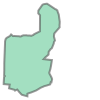

In [ ]:
ateneo_shp['geometry'].values[0]

In [ ]:
amenities_within_ateneo = ox.geometries.geometries_from_polygon(
                         ateneo_shp['geometry'].values[0], 
                         tags={'amenity': True})
amenities_within_ateneo = amenities_within_ateneo[amenities_within_ateneo['name'] 
                                                  != 'Ateneo de Manila University']
amenities_within_ateneo

addr:city           amenity    denomination is_in:city  \
element_type osmid                                                              
node         255059088  Marikina  place_of_worship  roman_catholic   Marikina   
             273557856       NaN           parking             NaN        NaN   
             273557865       NaN           parking             NaN        NaN   
             273557883       NaN           parking             NaN        NaN   
             273557888       NaN           parking             NaN        NaN   
...                          ...               ...             ...        ...   
way          562645788       NaN           parking             NaN        NaN   
             562645789       NaN           parking             NaN        NaN   
             562645791       NaN           parking             NaN        NaN   
             984179993       NaN           parking             NaN        NaN   
relation     3812734         NaN        university             NaN        NaN   

                                           name   religion  source  \
element_type osmid                                                   
node         255059088  San Jose Major Seminary  christian  jklinc   
             273557856                      NaN        NaN     NaN   
             273557865                      NaN        NaN     NaN   
             273557883                      NaN        NaN     NaN   
             273557888                      NaN        NaN     NaN   
...                                         ...        ...     ...   
way          562645788            East Car Park        NaN     NaN   
             562645789                      NaN        NaN     NaN   
             562645791                      NaN        NaN     NaN   
             984179993                      NaN        NaN     NaN   
relation     3812734               Cervini Hall        NaN     NaN   

                                                  source:url  \
element_type osmid                                             
node         255059088  http://www.freewebs.com/phroadguide/   
             273557856                                   NaN   
             273557865                                   NaN   
             273557883                                   NaN   
             273557888                                   NaN   
...                                                      ...   
way          562645788                                   NaN   
             562645789                                   NaN   
             562645791                                   NaN   
             984179993                                   NaN   
relation     3812734                                     NaN   

                                                                 geometry  \
element_type osmid                                                          
node         255059088                         POINT (121.08119 14.63486)   
             273557856                         POINT (121.07938 14.64109)   
             273557865                         POINT (121.07592 14.64048)   
             273557883                         POINT (121.07749 14.63625)   
             273557888                         POINT (121.07884 14.63647)   
...                                                                   ...   
way          562645788  POLYGON ((121.07831 14.63780, 121.07820 14.637...   
             562645789  POLYGON ((121.07506 14.63609, 121.07507 14.636...   
             562645791  POLYGON ((121.07507 14.63598, 121.07508 14.635...   
             984179993  POLYGON ((121.08017 14.64230, 121.08049 14.642...   
relation     3812734    POLYGON ((121.08063 14.63934, 121.08063 14.639...   

                       access  ... previously parking park_ride healthcare  \
element_type osmid             ...                                           
node         255059088    NaN  ...        NaN     NaN       NaN    

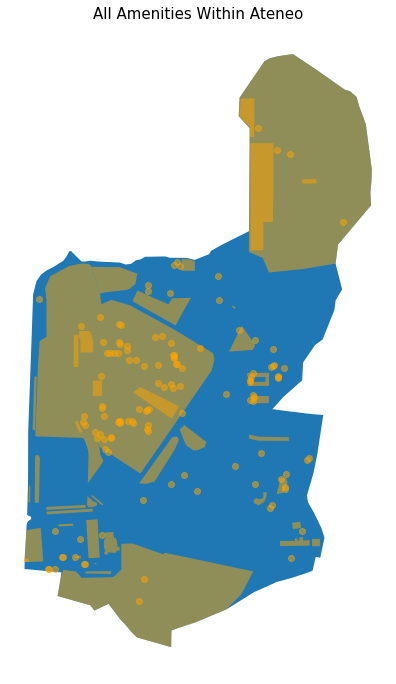

In [ ]:
# visualizing all amenities
fig, ax = plt.subplots(figsize=(20,12))

# plot the Ateneo map first
ateneo_shp.plot(ax=ax)

# and then the amenities/points of interest
amenities_within_ateneo.plot(ax=ax, color='orange', alpha=0.5)
ax.axis('off')
ax.set_title('All Amenities Within Ateneo', fontsize=15)
plt.show()

Let's annotate the map by getting the centroids of all the `polygons`.

To calculate the centroid of a particular `polygon`, we filter all polygons (which are `ways` or `relations`) and then use the `centroid` attribute.

We do the same process in calculating the `area` (in square meters) of a particular `polygon`.

In [ ]:
ateneo = amenities_within_ateneo.reset_index()

In [ ]:
pd.set_option('display.max_columns', 500)

ateneo_areas = ateneo[ateneo['element_type'].isin(['way', 'relation'])]
ateneo_areas

,element_type,osmid,addr:city,amenity,denomination,is_in:city,name,religion,source,source:url,geometry,access,name:en,addr:postcode,addr:street,level,capacity,opening_hours,outdoor_seating,takeaway,short_name,website,wikidata,wikipedia,operator,supervised,cuisine,note,waste,vending,description,recycling:waste,recycling_type,female,male,wheelchair,highway,delivery,smoking,internet_access,internet_access:fee,stars,bench,nodes,building,layer,addr:housename,previously,parking,park_ride,healthcare,shelter_type,surface,bus,public_transport,ways,type
125,way,25766778,NaN,place_of_worship,roman_catholic,NaN,Church of the Gesu,christian,NaN,NaN,"POLYGON ((121.07995 14.64048, 121.07963 14.639...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q5117852,"en:Church of the Gesù, Quezon City",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[281018979, 281018980, 281018981, 1234346517, ...",church,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,way,25766987,NaN,college,NaN,NaN,Loyola Schools,NaN,NaN,NaN,"POLYGON ((121.07490 14.64010, 121.07507 14.640...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[281024881, 2683499287, 3086853560, 1516247271...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,way,25775190,NaN,school,NaN,NaN,Ateneo Grade School,NaN,NaN,NaN,"POLYGON ((121.07542 14.63439, 121.07535 14.633...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[281143335, 7444885575, 478549089, 7444885552,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,way,25848770,NaN,place_of_worship,NaN,NaN,St. Kostka Chapel,christian,NaN,NaN,"POLYGON ((121.08145 14.64401, 121.08146 14.643...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[281946264, 281946265, 5319901768, 5319901769,...",chapel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,way,27835548,NaN,school,NaN,NaN,Ateneo de Manila High School,NaN,NaN,NaN,"POLYGON ((121.08063 14.64176, 121.08150 14.641...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[281025603, 1516247301, 410802305, 281025599, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,way,95475448,Quezon City,theatre,NaN,NaN,University Theater Henry Lee Irwin Theatre,NaN,NaN,NaN,"POLYGON ((121.07655 14.63548, 121.07655 14.635...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1107042652, 1107042635, 1107042658, 110704267...",yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,way,107394780,Marikina,college,NaN,NaN,San Jose Seminary Main Building,NaN,NaN,NaN,"POLYGON ((121.08164 14.63529, 121.08165 14.635...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1234346201, 1234346214, 1234346206, 322838620...",yes,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,way,120255630,Marikina,place_of_worship,NaN,NaN,San Jose Seminary Chapel,christian,LAbad,NaN,"POLYGON ((121.08171 14.63532, 121.08190 14.635...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[3228386193, 1348824268, 1348824244, 134882427...",church,NaN,San Jose Seminary Chapel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,way,133805064,NaN,university,NaN,NaN,Eliazo Hall,NaN,NaN,NaN,"POLYGON ((121.08020 14.63878, 121.08020 14.638...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1472664855, 1472664851, 1472664858, 147266485...",yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,way,138294128,NaN,parking,NaN,NaN,North West Car Park,NaN,NaN,NaN,"POLYGON ((121.07640 14.

In [ ]:
# calculate the centroid
ateneo_areas['centroid'] = ateneo_areas['geometry'].centroid

ateneo_areas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,element_type,osmid,addr:city,amenity,denomination,is_in:city,name,religion,source,source:url,geometry,access,name:en,addr:postcode,addr:street,level,capacity,opening_hours,outdoor_seating,takeaway,short_name,website,wikidata,wikipedia,operator,supervised,cuisine,note,waste,vending,description,recycling:waste,recycling_type,female,male,wheelchair,highway,delivery,smoking,internet_access,internet_access:fee,stars,bench,nodes,building,layer,addr:housename,previously,parking,park_ride,healthcare,shelter_type,surface,bus,public_transport,ways,type,centroid
125,way,25766778,NaN,place_of_worship,roman_catholic,NaN,Church of the Gesu,christian,NaN,NaN,"POLYGON ((121.07995 14.64048, 121.07963 14.639...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q5117852,"en:Church of the Gesù, Quezon City",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[281018979, 281018980, 281018981, 1234346517, ...",church,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.07997 14.64008)
126,way,25766987,NaN,college,NaN,NaN,Loyola Schools,NaN,NaN,NaN,"POLYGON ((121.07490 14.64010, 121.07507 14.640...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[281024881, 2683499287, 3086853560, 1516247271...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.07671 14.63938)
127,way,25775190,NaN,school,NaN,NaN,Ateneo Grade School,NaN,NaN,NaN,"POLYGON ((121.07542 14.63439, 121.07535 14.633...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[281143335, 7444885575, 478549089, 7444885552,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.07787 14.63405)
128,way,25848770,NaN,place_of_worship,NaN,NaN,St. Kostka Chapel,christian,NaN,NaN,"POLYGON ((121.08145 14.64401, 121.08146 14.643...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[281946264, 281946265, 5319901768, 5319901769,...",chapel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.08164 14.64397)
129,way,27835548,NaN,school,NaN,NaN,Ateneo de Manila High School,NaN,NaN,NaN,"POLYGON ((121.08063 14.64176, 121.08150 14.641...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[281025603, 1516247301, 410802305, 281025599, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.08149 14.64437)
130,way,95475448,Quezon City,theatre,NaN,NaN,University Theater Henry Lee Irwin Theatre,NaN,NaN,NaN,"POLYGON ((121.07655 14.63548, 121.07655 14.635...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1107042652, 1107042635, 1107042658, 110704267...",yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.07667 14.63520)
131,way,107394780,Marikina,college,NaN,NaN,San Jose Seminary Main Building,NaN,NaN,NaN,"POLYGON ((121.08164 14.63529, 121.08165 14.635...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1234346201, 1234346214, 1234346206, 322838620...",yes,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.08129 14.63523)
132,way,120255630,Marikina,place_of_worship,NaN,NaN,San Jose Seminary Chapel,christian,LAbad,NaN,"POLYGON ((121.08171 14.63532, 121.08190 14.635...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[3228386193, 1348824268, 1348824244, 134882427...",church,NaN,San Jose Seminary Chapel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.08180 14.63523)
133,way,133805064,NaN,university,NaN,NaN,Eliazo Hall,NaN,NaN,NaN,"POLYGON ((121.08020 14.63878, 121.08020 14.638...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
ateneo = amenities_within_ateneo.reset_index()

# filter ways and relations
ateneo_areas = ateneo[ateneo['element_type'].isin(['way', 'relation'])]

# calculate the centroid
ateneo_areas['centroid'] = ateneo_areas['geometry'].centroid

# calculate the area
ateneo_areas['area'] = ateneo_areas['geometry'].area

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Remove the CWD from sys.path while we load stuff.


To make the map clean, we only label the `polygons` with large areas.

As we can see below, the three largest areas in the Ateneo de Manila University are the different schools (Ateneo Grade School, Ateneo High School, and the Loyola Schools).

In [ ]:
ateneo_areas = ateneo_areas.sort_values(by='area', ascending=False)
ateneo_areas[:3]

,element_type,osmid,addr:city,amenity,denomination,is_in:city,name,religion,source,source:url,geometry,access,name:en,addr:postcode,addr:street,level,capacity,opening_hours,outdoor_seating,takeaway,short_name,website,wikidata,wikipedia,operator,supervised,cuisine,note,waste,vending,description,recycling:waste,recycling_type,female,male,wheelchair,highway,delivery,smoking,internet_access,internet_access:fee,stars,bench,nodes,building,layer,addr:housename,previously,parking,park_ride,healthcare,shelter_type,surface,bus,public_transport,ways,type,centroid,area
126,way,25766987,NaN,college,NaN,NaN,Loyola Schools,NaN,NaN,NaN,"POLYGON ((121.07490 14.64010, 121.07507 14.640...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[281024881, 2683499287, 3086853560, 1516247271...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.07671 14.63938),0.000014
129,way,27835548,NaN,school,NaN,NaN,Ateneo de Manila High School,NaN,NaN,NaN,"POLYGON ((121.08063 14.64176, 121.08150 14.641...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[281025603, 1516247301, 410802305, 281025599, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.08149 14.64437),0.000013
127,way,25775190,NaN,school,NaN,NaN,Ateneo Grade School,NaN,NaN,NaN,"POLYGON ((121.07542 14.63439, 121.07535 14.633...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[281143335, 7444885575, 478549089, 7444885552,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.07787 14.63405),0.000006


In [ ]:
list(zip(ateneo_areas[:3]['name'], 
                           ateneo_areas[:3]['centroid']))

[('Loyola Schools', <shapely.geometry.point.Point at 0x7fce218afe10>),
 ('Ateneo de Manila High School',
  <shapely.geometry.point.Point at 0x7fce218af110>),
 ('Ateneo Grade School', <shapely.geometry.point.Point at 0x7fce218afd90>)]

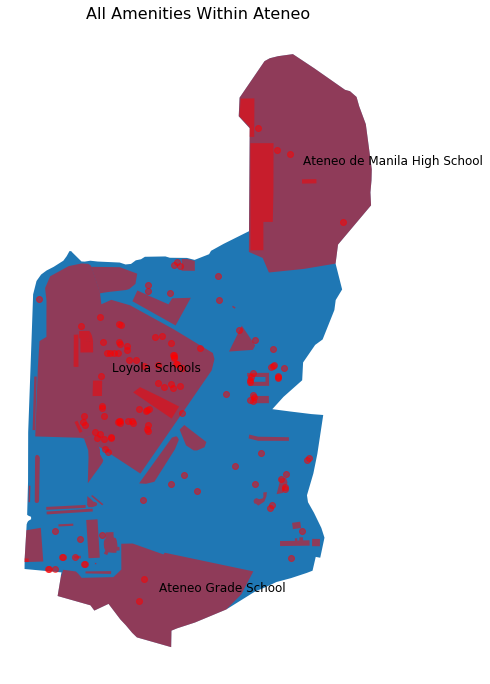

In [ ]:
# visualizing all amenities
fig, ax = plt.subplots(figsize=(20,12))

# plot the Ateneo map first
ateneo_shp.plot(ax=ax)

# and then the amenities/points of interest
amenities_within_ateneo.plot(ax=ax, color='red', alpha=0.5)
ax.axis('off')

# label the three largest areas on the Ateneo de Manila University
for label, loc in list(zip(ateneo_areas[:3]['name'], 
                           ateneo_areas[:3]['centroid'])):
    ax.annotate(label, xy=(loc.x, loc.y), fontsize=12)

ax.set_title('All Amenities Within Ateneo', fontsize=16)
plt.show()

To learn more about OSMNX, you may check the documentation here: https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.geometries.

## Geospatial Data Visualization

We now use the Open Street Maps (OSM) and the Database of Global Administative Areas (GADM) for data visualization.

In [ ]:
ph_df = pd.read_csv('/content/gdrive/My Drive/GSA/GADM_PH.csv', index_col=0)
ph_df

,country,province,city,geom
0,Philippines,Abra,Bangued,"MULTIPOLYGON(((120.62709808 17.49300003,120.62..."
1,Philippines,Abra,Boliney,"MULTIPOLYGON(((120.99041748 17.39801979,120.98..."
2,Philippines,Abra,Bucay,"MULTIPOLYGON(((120.70787811 17.45395088,120.70..."
3,Philippines,Abra,Bucloc,"MULTIPOLYGON(((120.78955841 17.41699028,120.78..."
4,Philippines,Abra,Daguioman,"MULTIPOLYGON(((120.9291687 17.41307068,120.924..."
...,...,...,...,...
1642,Philippines,Zamboanga Sibugay,Naga,"MULTIPOLYGON(((122.77500153 7.76833296,122.775..."
1643,Philippines,Zamboanga Sibugay,Talusan,"MULTIPOLYGON(((122.91916656 7.34111023,122.918..."
1644,Philippines,Zamboanga Sibugay,Olutanga,"MULTIPOLYGON(((122.85804749 7.27652979,122.858..."
1645,Philippines,Zamboanga Sibugay,Payao,"MULTIPOLYGON(((122.69194794 7.46228981,122.691..."


In [ ]:
poi_df = pd.read_csv('/content/gdrive/My Drive/GSA/OSM_PH.csv', index_col=0)
poi_df

,osm_id,name,amenity,geom
0,4332833465,NaN,NaN,POINT(112.1949265 8.8449947)
1,5127953795,Đá Tây,NaN,POINT(112.256657 8.8662704)
2,4332833991,NaN,ferry_terminal,POINT(112.2559262 8.8669522)
3,2645876983,NaN,NaN,POINT(112.2570335 8.8675949)
4,2645876976,West Reef,NaN,POINT(112.2585258 8.8697425)
...,...,...,...,...
243460,302226679,Matulin Rock,NaN,POINT(124.29 14.106667)
243461,3206221532,Benham Bank,NaN,POINT(124.2682754 15.8004096)
243462,3207389384,Benham Bank Anchorage,NaN,POINT(124.2692 15.799163)
243463,2150581161,Benham Plateau,NaN,POINT(124.7499997 16.4999999)


Notice that both of the DataFrames above have `geometry` attributes, which represent the geospatial attribute of each row. Since the information above are `pandas` DataFrames, they do not have any value for us. To make them usable, we convert them into `GeoDataFrames` using the `geopandas` library.

In [ ]:
# convert GADM data to shapefile
ph_df['geometry'] = ph_df['geom'].apply(wkt.loads)
ph_gdf = gpd.GeoDataFrame(ph_df, crs='epsg:4326')

# convert OSM data to shapefile
poi_df['geometry'] = poi_df['geom'].apply(wkt.loads)
poi_gdf = gpd.GeoDataFrame(poi_df, crs='epsg:4326')

In [ ]:
ph_gdf.dtypes

country       object
province      object
city          object
geom          object
geometry    geometry
dtype: object

In [ ]:
type(poi_gdf)

geopandas.geodataframe.GeoDataFrame

Since we have converted the following into `GeoDataFrames`, we can now easily visualize our shapefile data.

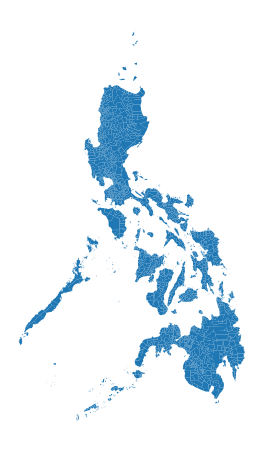

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ph_gdf.plot(ax=ax)
ax.axis('off')
plt.show()

We can make our plot more aesthetically appealing by changing the colors using matplotlib.

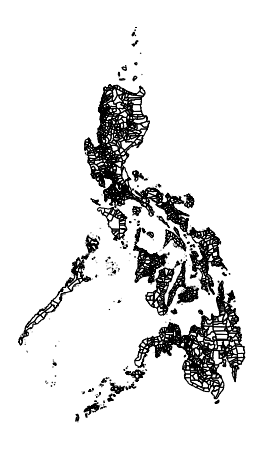

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ph_gdf.plot(ax=ax, facecolor='none', edgecolor='black')
ax.axis('off')
plt.show()

Suppose that we want to plot all the points of interest that we were able to gather in the `Open Street Map (OSM)` database. To do this, we can overlay the points on our map above.

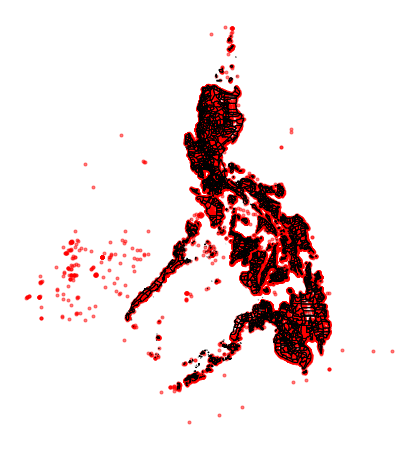

In [ ]:
fig, ax1 = plt.subplots(figsize=(25,8))
poi_gdf.plot(ax=ax1, color='red', marker='.', alpha=0.5)
ph_gdf.plot(ax=ax1, facecolor='none', edgecolor='black')
ax1.axis('off')
plt.show()

Recognizing that the OSM points of interest data was only collected through crowdsourcing and volunteer efforts, it has some inaccuracies. Note as well from the OSM data that there are some points of interest that do not have any `name` or `amenity_type` at all.

Now, suppose that we just want to filter our analysis within NCR. To do this, we can filter our shapefile data with respect to NCR only.

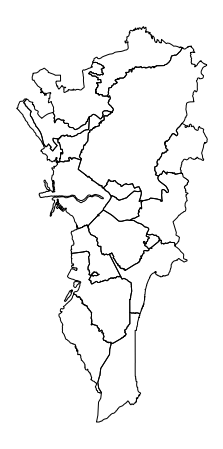

In [ ]:
ncr_gdf = ph_gdf[ph_gdf['province'] == 'Metropolitan Manila']
ncr_gdf.plot(figsize=(15,8), facecolor='none', edgecolor='black')
plt.axis('off')
plt.show()



```
# This is formatted as code
```

We may want to visualize the points of interest available in NCR. However, the OSM dataset does not have similar keys with the shapefiles. Hence, we need to apply `spatial joins` in order to combine both datasets.

To do this, we have to first check whether the geospatial datasets that we would be merging would have the same coordinate reference system (CRS).

In [ ]:
ncr_gdf

,country,province,city,geom,geometry
959,Philippines,Metropolitan Manila,Pateros,"MULTIPOLYGON(((121.06864166 14.53991985,121.06...","MULTIPOLYGON (((121.06864 14.53992, 121.06883 ..."
960,Philippines,Metropolitan Manila,Quezon City,"MULTIPOLYGON(((121.01576233 14.60610104,121.01...","MULTIPOLYGON (((121.01576 14.60610, 121.01511 ..."
973,Philippines,Metropolitan Manila,Mandaluyong,"MULTIPOLYGON(((121.05404663 14.57747173,121.05...","MULTIPOLYGON (((121.05405 14.57747, 121.05408 ..."
974,Philippines,Metropolitan Manila,Manila,"MULTIPOLYGON(((120.99141693 14.56218147,120.98...","MULTIPOLYGON (((120.99142 14.56218, 120.98849 ..."
975,Philippines,Metropolitan Manila,Marikina,"MULTIPOLYGON(((121.07345581 14.61962032,121.07...","MULTIPOLYGON (((121.07346 14.61962, 121.07432 ..."
976,Philippines,Metropolitan Manila,Muntinlupa,"MULTIPOLYGON(((121.02339172 14.35760021,121.02...","MULTIPOLYGON (((121.02339 14.35760, 121.02313 ..."
981,Philippines,Metropolitan Manila,Kalookan City,"MULTIPOLYGON(((121.02068329 14.71426105,121.02...","MULTIPOLYGON (((121.02068 14.71426, 121.02071 ..."
982,Philippines,Metropolitan Manila,Las Piñas,"MULTIPOLYGON(((120.97972107 14.49305534,120.98...","MULTIPOLYGON (((120.97972 14.49306, 120.98000 ..."
983,Philippines,Metropolitan Manila,Makati City,"MULTIPOLYGON(((121.06578064 14.53872108,121.06...","MULTIPOLYGON (((121.06578 14.53872, 121.06594 ..."
984,Philippines,Metropolitan Manila,Malabon,"MULTIPOLYGON(((120.95800018 14.65938091,120.95...","MULTIPOLYGON (((120.95800 14.65938, 120.95796 ..."


In [ ]:
ncr_gdf.crs == poi_gdf.crs

True

In [ ]:
merge_1 = gpd.sjoin(ncr_gdf, poi_gdf, predicate='contains')
merge_1

,country,province,city,geom_left,geometry,index_right,osm_id,name,amenity,geom_right
959,Philippines,Metropolitan Manila,Pateros,"MULTIPOLYGON(((121.06864166 14.53991985,121.06...","MULTIPOLYGON (((121.06864 14.53992, 121.06883 ...",182300,255058348,Southern Rizal Institute,school,POINT(121.068611 14.53961)
959,Philippines,Metropolitan Manila,Pateros,"MULTIPOLYGON(((121.06864166 14.53991985,121.06...","MULTIPOLYGON (((121.06864 14.53992, 121.06883 ...",182297,5055079422,TK,nightclub,POINT(121.0673295 14.5396869)
959,Philippines,Metropolitan Manila,Pateros,"MULTIPOLYGON(((121.06864166 14.53991985,121.06...","MULTIPOLYGON (((121.06864 14.53992, 121.06883 ...",182292,1363529601,Martirez del '96,NaN,POINT(121.0656832 14.5397264)
959,Philippines,Metropolitan Manila,Pateros,"MULTIPOLYGON(((121.06864166 14.53991985,121.06...","MULTIPOLYGON (((121.06864 14.53992, 121.06883 ...",182291,1323171902,NaN,place_of_worship,POINT(121.0650407 14.5397932)
959,Philippines,Metropolitan Manila,Pateros,"MULTIPOLYGON(((121.06864166 14.53991985,121.06...","MULTIPOLYGON (((121.06864 14.53992, 121.06883 ...",182298,4927836529,Motolite,NaN,POINT(121.067403 14.5400665)
...,...,...,...,...,...,...,...,...,...,...
992,Philippines,Metropolitan Manila,Valenzuela,"MULTIPOLYGON(((120.94808197 14.7063303,120.948...","MULTIPOLYGON (((120.94808 14.70633, 120.94830 ...",195510,4549557389,Magdula bldg.15-17,NaN,POINT(120.9805363 14.6731462)
992,Philippines,Metropolitan Manila,Valenzuela,"MULTIPOLYGON(((120.94808197 14.7063303,120.948...","MULTIPOLYGON (((120.94808 14.70633, 120.94830 ...",196663,593995157,MR. T. Inasal,restaurant,POINT(120.9821015 14.6732037)
992,Philippines,Metropolitan Manila,Valenzuela,"MULTIPOLYGON(((120.94808197 14.7063303,120.948...","MULTIPOLYGON (((120.94808 14.70633, 120.94830 ...",196662,4549336090,Magdula building,NaN,POINT(120.9817621 14.6732425)
992,Philippines,Metropolitan Manila,Valenzuela,"MULTIPOLYGON(((120.94808197 14.7063303,120.948...","MULTIPOLYGON (((120.94808 14.70633, 120.94830 ...",196665,593995135,Jollibee,fast_food,POINT(120.9821262 14.6734891)


In [ ]:
merge_2 = gpd.sjoin(poi_gdf, ncr_gdf, predicate='within')
merge_2

,osm_id,name,amenity,geom_left,geometry,index_right,country,province,city,geom_right
115234,255070734,San Rafael Chapel,place_of_worship,POINT(120.93618 14.66904),POINT (120.93618 14.66904),986,Philippines,Metropolitan Manila,Navotas,"MULTIPOLYGON(((120.96163177 14.63365078,120.96..."
115235,255061710,Tangos Barangay Hall,public_building,POINT(120.931719 14.6748892),POINT (120.93172 14.67489),986,Philippines,Metropolitan Manila,Navotas,"MULTIPOLYGON(((120.96163177 14.63365078,120.96..."
115236,943216595,Tangos Elementary School,school,POINT(120.9321538 14.6747701),POINT (120.93215 14.67477),986,Philippines,Metropolitan Manila,Navotas,"MULTIPOLYGON(((120.96163177 14.63365078,120.96..."
115237,1628085104,Tangos,NaN,POINT(120.9337954 14.6745136),POINT (120.93380 14.67451),986,Philippines,Metropolitan Manila,Navotas,"MULTIPOLYGON(((120.96163177 14.63365078,120.96..."
115238,255061222,Caltex,fuel,POINT(120.9357852 14.6727408),POINT (120.93579 14.67274),986,Philippines,Metropolitan Manila,Navotas,"MULTIPOLYGON(((120.96163177 14.63365078,120.96..."
...,...,...,...,...,...,...,...,...,...,...
213928,255067055,St. Mary Subdivision,NaN,POINT(121.114311 14.669501),POINT (121.11431 14.66950),975,Philippines,Metropolitan Manila,Marikina,"MULTIPOLYGON(((121.07345581 14.61962032,121.07..."
213929,426466439,NaN,NaN,POINT(121.1154688 14.6714153),POINT (121.11547 14.67142),975,Philippines,Metropolitan Manila,Marikina,"MULTIPOLYGON(((121.07345581 14.61962032,121.07..."
213930,255061168,Marikina Village,NaN,POINT(121.116142 14.6698),POINT (121.11614 14.66980),975,Philippines,Metropolitan Manila,Marikina,"MULTIPOLYGON(((121.07345581 14.61962032,121.07..."
213932,255066651,Manila Boystown Complex,NaN,POINT(121.119506 14.667131),POINT (121.11951 14.66713),975,Philippines,Metropolitan Manila,Marikina,"MULTIPOLYGON(((121.07345581 14.61962032,121.07..."




```
# This is formatted as code
```

From the result of the merging, we can conclude that geospatial object A `containing` geospatial object B is equivalent to geospatial object B being `within` geospatial object A.

We can now visualize the points of interest within NCR. To make the graph more meaningful, we drop rows that have `NaN` values in either the `name` or the `amenity`.  

In [ ]:
poi_ncr = merge_2[['osm_id', 'name', 'amenity', 'province', 'city', 'geometry']]
poi_ncr = poi_ncr.dropna()
poi_ncr

,osm_id,name,amenity,province,city,geometry
115234,255070734,San Rafael Chapel,place_of_worship,Metropolitan Manila,Navotas,POINT (120.93618 14.66904)
115235,255061710,Tangos Barangay Hall,public_building,Metropolitan Manila,Navotas,POINT (120.93172 14.67489)
115236,943216595,Tangos Elementary School,school,Metropolitan Manila,Navotas,POINT (120.93215 14.67477)
115238,255061222,Caltex,fuel,Metropolitan Manila,Navotas,POINT (120.93579 14.67274)
115239,4253413791,Iglesia Ni Cristo,place_of_worship,Metropolitan Manila,Navotas,POINT (120.93590 14.67306)
...,...,...,...,...,...,...
213889,2303460632,Primemont Science School,school,Metropolitan Manila,Marikina,POINT (121.11486 14.66476)
213892,255064943,Caltex,fuel,Metropolitan Manila,Marikina,POINT (121.11901 14.66276)
213915,459418392,Fortune Elementary School,school,Metropolitan Manila,Marikina,POINT (121.12565 14.66058)
213922,672597463,Marikina City Police Station Precinct 15,police,Metropolitan Manila,Marikina,POINT (121.12444 14.66321)


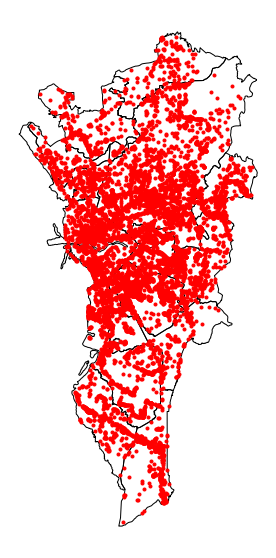

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ncr_gdf.plot(ax=ax, facecolor='none', edgecolor='black')
poi_ncr.plot(ax=ax, color='red', marker='.')
plt.axis('off')
plt.show()

Suppose we are interested to visualize the number of restaurants per city in NCR. To do this, we can play around with the `GeoDataFrame` to be able to get the number of restaurants per city.

In [ ]:
result = pd.DataFrame(poi_ncr.groupby('city')['amenity'].value_counts())
result.columns = ['count']
result = result.reset_index()
result = result[result['amenity'] == 'restaurant']
result

,city,amenity,count
6,Kalookan City,restaurant,22
43,Las Piñas,restaurant,98
89,Makati City,restaurant,670
169,Malabon,restaurant,18
202,Mandaluyong,restaurant,79
249,Manila,restaurant,251
307,Marikina,restaurant,101
367,Muntinlupa,restaurant,158
427,Parañaque,restaurant,166
481,Pasay City,restaurant,146


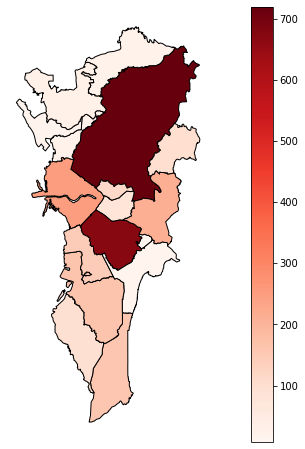

In [ ]:
# merging the result df to the shapefiles, we have

ncr_poi_count = pd.merge(ncr_gdf, result, on='city')
fig, ax = plt.subplots(figsize=(15, 8))
ncr_poi_count.plot(ax=ax, column='count', cmap='Reds', legend=True, edgecolor='black')
ax.axis('off')
plt.show()

## Calculating Distances

Suppose that a manufacturing company has a distribution hub near the `Araneta Coliseum` in `Quezon City`. One may be interested to calculate the distance of the distribution hub to the different stores, in which case we would assume to be located at the `center` of each city in NCR.

We can calculate distances by first defining the point in which we want to calculate distances from. Recall that we can use `OSMNX` in order to be able to find latitude-longitude coordinates.

In [ ]:
araneta = ox.geocoder.geocode(query='Araneta Coliseum')
araneta 

(14.6207157, 121.05335568011861)

To be able to accurately calculate distances, we have to convert the `spatial reference system` of the coordinates to `EPSG:3123`. This spatial reference system accurately depicts the Philippine location data relative to `EPSG:4326` (which serves as the global representation of each location in the Philippines).

In [ ]:
proj = pyproj.Transformer.from_crs(4326, 3123, always_xy=True)
araneta_longitude = araneta[1] # note that this is the X coordinate
araneta_latitude = araneta[0] # note that this is the Y coordinate

x, y = proj.transform(araneta_longitude, araneta_latitude)
print((x, y))

(505601.78180530097, 1617009.8220007233)


Now, we can calculate distances by converting the `geometry` column's spatial reference system to `EPSG:3123` as well so that the distance calculation would be done on the same axis.

This site is also helpful in transforming global latitude-longitude coordinates to their appropriate EPSGs: https://epsg.io/transform#s_srs=4326&t_srs=3123

In [ ]:
# calculating distances


# you can think of EPSG 3123 as a different coordinate system to represent our point
araneta_point = Point(x, y) 

# next, we convert the coordinate system of the NCR polygons
ncr_gdf['geometry'] = ncr_gdf['geometry'].to_crs(epsg=3123)

# afterwards, we can calculate the distance of each city from the
ncr_gdf['distance_from_araneta'] = ncr_gdf['geometry'].distance(araneta_point)
ncr_gdf

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,country,province,city,geom,geometry,distance_from_araneta
959,Philippines,Metropolitan Manila,Pateros,"MULTIPOLYGON(((121.06864166 14.53991985,121.06...","MULTIPOLYGON (((507251.026 1608070.956, 507271...",7369.597447
960,Philippines,Metropolitan Manila,Quezon City,"MULTIPOLYGON(((121.01576233 14.60610104,121.01...","MULTIPOLYGON (((501551.795 1615392.352, 501481...",0.000000
973,Philippines,Metropolitan Manila,Mandaluyong,"MULTIPOLYGON(((121.05404663 14.57747173,121.05...","MULTIPOLYGON (((505677.219 1612225.314, 505680...",2111.089850
974,Philippines,Metropolitan Manila,Manila,"MULTIPOLYGON(((120.99141693 14.56218147,120.98...","MULTIPOLYGON (((498928.490 1610533.123, 498612...",4182.806546
975,Philippines,Metropolitan Manila,Marikina,"MULTIPOLYGON(((121.07345581 14.61962032,121.07...","MULTIPOLYGON (((507767.270 1616889.171, 507860...",2140.265373
976,Philippines,Metropolitan Manila,Muntinlupa,"MULTIPOLYGON(((121.02339172 14.35760021,121.02...","MULTIPOLYGON (((502375.796 1587898.488, 502347...",16796.607229
981,Philippines,Metropolitan Manila,Kalookan City,"MULTIPOLYGON(((121.02068329 14.71426105,121.02...","MULTIPOLYGON (((502081.235 1627359.287, 502083...",7061.653483
982,Philippines,Metropolitan Manila,Las Piñas,"MULTIPOLYGON(((120.97972107 14.49305534,120.98...","MULTIPOLYGON (((497667.223 1602885.157, 497697...",16150.230494
983,Philippines,Metropolitan Manila,Makati City,"MULTIPOLYGON(((121.06578064 14.53872108,121.06...","MULTIPOLYGON (((506942.721 1607938.243, 506959...",5672.931696
984,Philippines,Metropolitan Manila,Malabon,"MULTIPOLYGON(((120.95800018 14.65938091,120.95...","MULTIPOLYGON (((495329.746 1621287.806, 495325...",7979.373956


Cool! We can see that San Juan seems to be the closest location to the Araneta distribution center.

Note that the distances generated through this code are in `meters`.

## Basic Network Science

In order to make sense of how are objects in systems are interrelated, we use `network science`. This would help us identify which are the central or crucial objects in the system, such that problems over that object could crumble the entire system altogether.

Network science visualizes the relationships among elements using a graph. A `network graph` is a graphical representation of a set of objects where some pairs of objects are connected by links. The interconnected objects are represented by points termed as `nodes`, and the links that connect the vertices are called `edges`. Formally, a graph is a pair of sets of nodes and edges - with the node representing the object and each edge connecting these objects.

To construct graphs in the Jupyter notebook, we import the <b>networkx</b> library, which is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. 

If your device does not recognize the networkx library, you may install it on your computers by typing <b> pip install networkx </b> on the Anaconda prompt (for Windows users) or on the Terminal (for Mac users).

In [ ]:
import networkx as nx

Note that there might exists some properties or description about graph, edges or nodes, which are called <b>graph attributes</b>, or specifically nodes attributes and edge attributes respectively.

Therefore, we know that a network must consist of a graph along with its attributes.

We initialize an empty graph using the .Graph() method.

In [ ]:
graph = nx.Graph()
graph

To add nodes in our graph, we can use the add_node method if we would like to add only one, or the add_nodes_from method if we would like to add multiple nodes.

In [ ]:
# add a single node
#graph.add_node('Quezon City')

# add multiple nodes
cities = list(ncr_gdf['city'])
graph.add_nodes_from(cities)

To visualize our graph, we use the draw_networkx method. If you want to visualize your graph without the x and y axis, use the draw method.

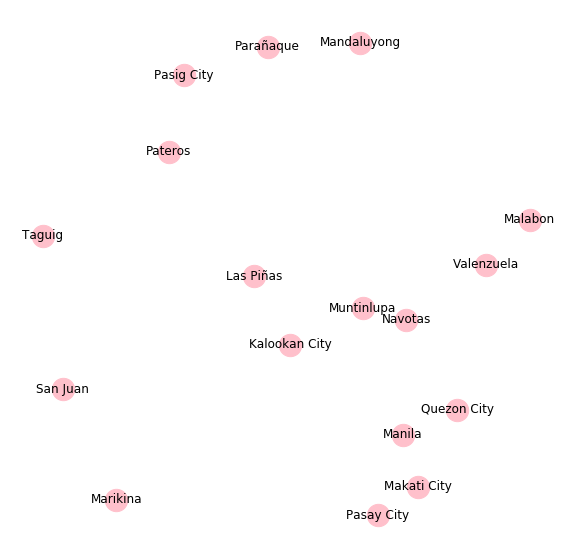

In [ ]:
# node colors can be one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
plt.figure(figsize=(10,10))
nx.draw_networkx(graph, pos = nx.random_layout(graph), 
                 with_labels=True, node_size=500, node_color='pink')
plt.axis('off')
plt.show()

The same process is observed when adding edges. We can add edges one by one using `add_edge` method or `add_edges_from` if we would like to add multiple nodes.

In [ ]:
ncr_gdf["neighbors"] = None  

for index, location in ncr_gdf.iterrows():   

    # get 'not disjoint' countries
    neighbors = ncr_gdf[~ncr_gdf['geometry'].disjoint(location['geometry'])]['city'].tolist()

    # remove own name of the country from the list
    neighbors = [name for name in neighbors if location['city'] != name]

    # add names of neighbors as NEIGHBORS value
    ncr_gdf.at[index, "neighbors"] = ",".join(neighbors)
    
ncr_gdf

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,country,province,city,geom,geometry,distance_from_araneta,neighbors,centroid
959,Philippines,Metropolitan Manila,Pateros,"MULTIPOLYGON(((121.06864166 14.53991985,121.06...","MULTIPOLYGON (((121.06864 14.53992, 121.06883 ...",7369.597447,"Makati City,Pasig City,Taguig",POINT (121.06941 14.54719)
960,Philippines,Metropolitan Manila,Quezon City,"MULTIPOLYGON(((121.01576233 14.60610104,121.01...","MULTIPOLYGON (((121.01576 14.60610, 121.01511 ...",0.000000,"Mandaluyong,Manila,Marikina,Kalookan City,Pasi...",POINT (121.05750 14.67428)
973,Philippines,Metropolitan Manila,Mandaluyong,"MULTIPOLYGON(((121.05404663 14.57747173,121.05...","MULTIPOLYGON (((121.05405 14.57747, 121.05408 ...",2111.089850,"Quezon City,Manila,Makati City,Pasig City,San ...",POINT (121.03904 14.58423)
974,Philippines,Metropolitan Manila,Manila,"MULTIPOLYGON(((120.99141693 14.56218147,120.98...","MULTIPOLYGON (((120.99142 14.56218, 120.98849 ...",4182.806546,"Quezon City,Mandaluyong,Kalookan City,Makati C...",POINT (120.98469 14.59974)
975,Philippines,Metropolitan Manila,Marikina,"MULTIPOLYGON(((121.07345581 14.61962032,121.07...","MULTIPOLYGON (((121.07346 14.61962, 121.07432 ...",2140.265373,"Quezon City,Pasig City",POINT (121.10301 14.64718)
976,Philippines,Metropolitan Manila,Muntinlupa,"MULTIPOLYGON(((121.02339172 14.35760021,121.02...","MULTIPOLYGON (((121.02339 14.35760, 121.02313 ...",16796.607229,"Las Piñas,Parañaque,Taguig",POINT (121.03278 14.40198)
981,Philippines,Metropolitan Manila,Kalookan City,"MULTIPOLYGON(((121.02068329 14.71426105,121.02...","MULTIPOLYGON (((121.02068 14.71426, 121.02071 ...",7061.653483,"Quezon City,Manila,Malabon,Navotas,Valenzuela",POINT (121.03331 14.72449)
982,Philippines,Metropolitan Manila,Las Piñas,"MULTIPOLYGON(((120.97972107 14.49305534,120.98...","MULTIPOLYGON (((120.97972 14.49306, 120.98000 ...",16150.230494,"Muntinlupa,Parañaque",POINT (120.99387 14.44291)
983,Philippines,Metropolitan Manila,Makati City,"MULTIPOLYGON(((121.06578064 14.53872108,121.06...","MULTIPOLYGON (((121.06578 14.53872, 121.06594 ...",5672.931696,"Pateros,Mandaluyong,Manila,Pasay City,Pasig Ci...",POINT (121.03359 14.54943)
984,Philippines,Metropolitan Manila,Malabon,"MULTIPOLYGON(((120.95800018 14.65938091,120.95...","MULTIPOLYGON (((120.95800 14.65938, 120.95796 ...",7979.373956,"Kalookan City,Navotas,Valenzuela",POINT (120.95772 14.67204)


In [ ]:
roads = []

for city, neighbors in list(zip(ncr_gdf['city'], ncr_gdf['neighbors'])):
    neighbors_list = neighbors.split(',')
    for neighbor in neighbors_list:
        if tuple((neighbor, city)) or tuple((city, neighbor)) not in roads:
            roads.append((city, neighbor))   
        
roads

[('Pateros', 'Makati City'),
 ('Pateros', 'Pasig City'),
 ('Pateros', 'Taguig'),
 ('Quezon City', 'Mandaluyong'),
 ('Quezon City', 'Manila'),
 ('Quezon City', 'Marikina'),
 ('Quezon City', 'Kalookan City'),
 ('Quezon City', 'Pasig City'),
 ('Quezon City', 'San Juan'),
 ('Quezon City', 'Valenzuela'),
 ('Mandaluyong', 'Quezon City'),
 ('Mandaluyong', 'Manila'),
 ('Mandaluyong', 'Makati City'),
 ('Mandaluyong', 'Pasig City'),
 ('Mandaluyong', 'San Juan'),
 ('Manila', 'Quezon City'),
 ('Manila', 'Mandaluyong'),
 ('Manila', 'Kalookan City'),
 ('Manila', 'Makati City'),
 ('Manila', 'Navotas'),
 ('Manila', 'Pasay City'),
 ('Manila', 'San Juan'),
 ('Marikina', 'Quezon City'),
 ('Marikina', 'Pasig City'),
 ('Muntinlupa', 'Las Piñas'),
 ('Muntinlupa', 'Parañaque'),
 ('Muntinlupa', 'Taguig'),
 ('Kalookan City', 'Quezon City'),
 ('Kalookan City', 'Manila'),
 ('Kalookan City', 'Malabon'),
 ('Kalookan City', 'Navotas'),
 ('Kalookan City', 'Valenzuela'),
 ('Las Piñas', 'Muntinlupa'),
 ('Las Piñas', '

In [ ]:
graph.nodes

NodeView(('Pateros', 'Quezon City', 'Mandaluyong', 'Manila', 'Marikina', 'Muntinlupa', 'Kalookan City', 'Las Piñas', 'Makati City', 'Malabon', 'Navotas', 'Parañaque', 'Pasay City', 'Pasig City', 'San Juan', 'Taguig', 'Valenzuela'))

In [ ]:
graph.add_edges_from(roads)

In [ ]:
graph.nodes

NodeView(('Pateros', 'Quezon City', 'Mandaluyong', 'Manila', 'Marikina', 'Muntinlupa', 'Kalookan City', 'Las Piñas', 'Makati City', 'Malabon', 'Navotas', 'Parañaque', 'Pasay City', 'Pasig City', 'San Juan', 'Taguig', 'Valenzuela'))

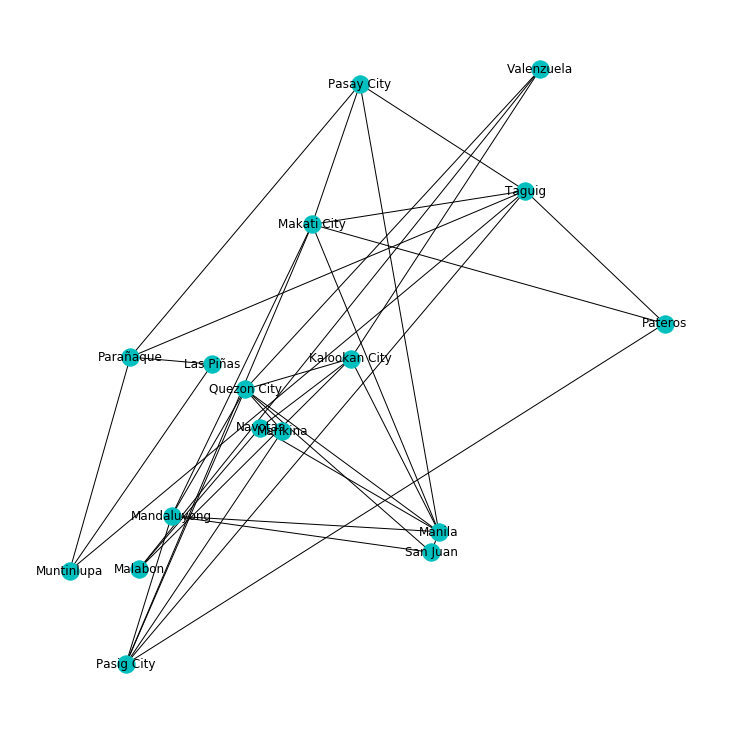

In [ ]:
plt.figure(figsize=(10,10))
nx.draw(graph, pos = nx.random_layout(graph), with_labels=True, node_color='c') # no grid since we used nx.draw()

Although it is cool to randomize the position of our city, this does not make sense in real life. Imagine if your location for each day is randomized in this manner? That would be pretty scary.

To set the positions of each city, we can declare a dictionary that has keys corresponding to the name of the node and values that correspond to the nodes' position following the Cartesian coordinate system.

In [ ]:
graph.nodes

NodeView(('Pateros', 'Quezon City', 'Mandaluyong', 'Manila', 'Marikina', 'Muntinlupa', 'Kalookan City', 'Las Piñas', 'Makati City', 'Malabon', 'Navotas', 'Parañaque', 'Pasay City', 'Pasig City', 'San Juan', 'Taguig', 'Valenzuela'))

In [ ]:
ncr_gdf['geometry'] = ncr_gdf['geometry'].to_crs(epsg=4326)
ncr_gdf['centroid'] = ncr_gdf['geometry'].centroid
loc_ncr_cities = ncr_gdf[['city', 'centroid']]
loc_ncr_cities

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

,city,centroid
959,Pateros,POINT (121.06941 14.54719)
960,Quezon City,POINT (121.05750 14.67428)
973,Mandaluyong,POINT (121.03904 14.58423)
974,Manila,POINT (120.98469 14.59974)
975,Marikina,POINT (121.10301 14.64718)
976,Muntinlupa,POINT (121.03278 14.40198)
981,Kalookan City,POINT (121.03331 14.72449)
982,Las Piñas,POINT (120.99387 14.44291)
983,Makati City,POINT (121.03359 14.54943)
984,Malabon,POINT (120.95772 14.67204)


In [ ]:
position = {}

for i, j in list(zip(loc_ncr_cities['city'], loc_ncr_cities['centroid'])):
    position[i] = (j.x, j.y)
    
position

{'Pateros': (121.06941430348365, 14.547189132395175),
 'Quezon City': (121.05749878735108, 14.674280599261303),
 'Mandaluyong': (121.03904140550344, 14.584232368003347),
 'Manila': (120.9846868198706, 14.599744025009265),
 'Marikina': (121.10301320641108, 14.647183781813757),
 'Muntinlupa': (121.03278462671742, 14.401976181440233),
 'Kalookan City': (121.03331236011226, 14.72449366836549),
 'Las Piñas': (120.99387115701641, 14.442908815443298),
 'Makati City': (121.03359061049899, 14.549431276634142),
 'Malabon': (120.9577232707235, 14.672041937462192),
 'Navotas': (120.94397356102418, 14.66347267425269),
 'Parañaque': (121.01450367550576, 14.48385381088083),
 'Pasay City': (121.00413646671628, 14.531090444838435),
 'Pasig City': (121.08423822686532, 14.582509806255404),
 'San Juan': (121.0338172042702, 14.60295528948146),
 'Taguig': (121.06605237587806, 14.514696948314887),
 'Valenzuela': (120.98238024109091, 14.704170899210062)}

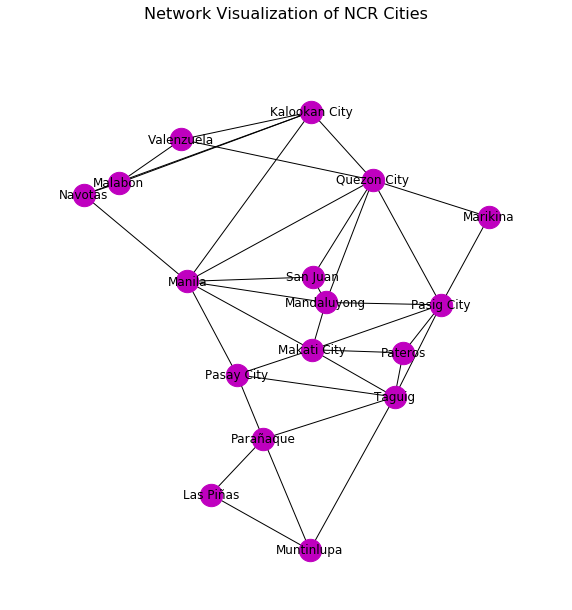

In [ ]:
#position = loc_ncr_cities.to_dict()['centroid']
#position={'Quezon City': (0.25, 0),'Marikina': (0.5,  1.5), 'Valenzuela': (-0.5,  2),'Makati': (-1,  -1.5),'Pasig':(-0.5,-1),'Manila':(1.5,-2)}

plt.figure(figsize=(10,10))
nx.draw_networkx(graph, with_labels=True, 
                 pos=position, node_size=500, node_color='m')
plt.axis('off')
plt.title('Network Visualization of NCR Cities\n\n', fontsize=16)
plt.show()

## Types of Graphs

Graphs can either be `directed` or `undirected`. Directed graphs are graphs where the edges have an associated direction with them, whereas undirected graphs are graphs that just connects a given set of nodes together.

Now that we have constructed our basic undirected graph, we can now view the information that is contained in it.

In [ ]:
print(nx.info(graph))

Graph with 17 nodes and 36 edges


In [ ]:
print('Nodes: ', nx.nodes(graph)) # prints out a list of nodes
print('\n')
print('Edges: ', nx.edges(graph)) # prints out a list of tuples containing edges
print('\n')
print('Number of Edges: ', nx.number_of_edges(graph)) # number of edges
print('\n')
print('Number of Nodes: ', nx.number_of_nodes(graph)) # number of nodes

Nodes:  ['Pateros', 'Quezon City', 'Mandaluyong', 'Manila', 'Marikina', 'Muntinlupa', 'Kalookan City', 'Las Piñas', 'Makati City', 'Malabon', 'Navotas', 'Parañaque', 'Pasay City', 'Pasig City', 'San Juan', 'Taguig', 'Valenzuela']


Edges:  [('Pateros', 'Makati City'), ('Pateros', 'Pasig City'), ('Pateros', 'Taguig'), ('Quezon City', 'Mandaluyong'), ('Quezon City', 'Manila'), ('Quezon City', 'Marikina'), ('Quezon City', 'Kalookan City'), ('Quezon City', 'Pasig City'), ('Quezon City', 'San Juan'), ('Quezon City', 'Valenzuela'), ('Mandaluyong', 'Manila'), ('Mandaluyong', 'Makati City'), ('Mandaluyong', 'Pasig City'), ('Mandaluyong', 'San Juan'), ('Manila', 'Kalookan City'), ('Manila', 'Makati City'), ('Manila', 'Navotas'), ('Manila', 'Pasay City'), ('Manila', 'San Juan'), ('Marikina', 'Pasig City'), ('Muntinlupa', 'Las Piñas'), ('Muntinlupa', 'Parañaque'), ('Muntinlupa', 'Taguig'), ('Kalookan City', 'Malabon'), ('Kalookan City', 'Navotas'), ('Kalookan City', 'Valenzuela'), ('Las Piñas', '

### Undirected Graphs

To find out how many cities are connected to each other, we use the degree method. The `degree` of a node would tell how many other nodes are connected to that node.

From the table below, we see that `Quezon City` and `Manila` has the most number of neighboring (i.e. border sharing) NCR cities.

In [ ]:
degree_df = pd.DataFrame(nx.degree(graph), columns=['city', 'degree'])
degree_df

,city,degree
0,Pateros,3
1,Quezon City,7
2,Mandaluyong,5
3,Manila,7
4,Marikina,2
5,Muntinlupa,3
6,Kalookan City,5
7,Las Piñas,2
8,Makati City,6
9,Malabon,3


An important concept in network analytics is what we call <b>neighbors</b>, which are the adjacent nodes of each node.

We can determine this using the neighbors method of `networkx`.

In [ ]:
# displays list of cities that are connected to Pasig by roads
print('Neighboring Cities Around Pasig: ', 
      list(nx.neighbors(graph, 'Pasig City'))) 
print('\n')

# displays list of cities that are connected to Marikina by roads
print('Neighboring Cities Around Marikina: ',
      list(nx.neighbors(graph, 'Marikina')))
print('\n')

# displays list of cities that are not connected to Quezon City by roads
print('Non-Neighboring Cities of Quezon City: ',
      list(nx.non_neighbors(graph, 'Quezon City'))) 
print('\n')

# displays list of common neighboring cities of Makati and Manila
print('Common Neighboring Cities of Makati and Manila: ',
    list(nx.common_neighbors(graph, 'Makati City', 'Manila')))

Neighboring Cities Around Pasig:  ['Pateros', 'Quezon City', 'Mandaluyong', 'Marikina', 'Makati City', 'Taguig']


Neighboring Cities Around Marikina:  ['Quezon City', 'Pasig City']


Non-Neighboring Cities of Quezon City:  ['Pateros', 'Muntinlupa', 'Las Piñas', 'Makati City', 'Malabon', 'Navotas', 'Parañaque', 'Pasay City', 'Taguig']


Common Neighboring Cities of Makati and Manila:  ['Mandaluyong', 'Pasay City']


In [ ]:
roads

[('Pateros', 'Makati City'),
 ('Pateros', 'Pasig City'),
 ('Pateros', 'Taguig'),
 ('Quezon City', 'Mandaluyong'),
 ('Quezon City', 'Manila'),
 ('Quezon City', 'Marikina'),
 ('Quezon City', 'Kalookan City'),
 ('Quezon City', 'Pasig City'),
 ('Quezon City', 'San Juan'),
 ('Quezon City', 'Valenzuela'),
 ('Mandaluyong', 'Quezon City'),
 ('Mandaluyong', 'Manila'),
 ('Mandaluyong', 'Makati City'),
 ('Mandaluyong', 'Pasig City'),
 ('Mandaluyong', 'San Juan'),
 ('Manila', 'Quezon City'),
 ('Manila', 'Mandaluyong'),
 ('Manila', 'Kalookan City'),
 ('Manila', 'Makati City'),
 ('Manila', 'Navotas'),
 ('Manila', 'Pasay City'),
 ('Manila', 'San Juan'),
 ('Marikina', 'Quezon City'),
 ('Marikina', 'Pasig City'),
 ('Muntinlupa', 'Las Piñas'),
 ('Muntinlupa', 'Parañaque'),
 ('Muntinlupa', 'Taguig'),
 ('Kalookan City', 'Quezon City'),
 ('Kalookan City', 'Manila'),
 ('Kalookan City', 'Malabon'),
 ('Kalookan City', 'Navotas'),
 ('Kalookan City', 'Valenzuela'),
 ('Las Piñas', 'Muntinlupa'),
 ('Las Piñas', '

Now, let us put `weights` on the edges that connect the nodes.

The `distance` that it would take to travel from one point to another could serve as an `edge attribute`. Other possible edge attributes could be `travel cost`, `flow rates`, etc.

We now calculate the distances of all connected nodes.

In [ ]:
distance = {}
for road in roads:
    # transform to EPSG 3123
    source = road[0]
    destination = road[1]
    x1, y1 = proj.transform(Point(position[source]).x, 
                            Point(position[source]).y)
    x2, y2 = proj.transform(Point(position[destination]).x, 
                            Point(position[destination]).y)
    
    # calculate distance and assign it as the weight
    graph[source][destination]['weight'] = Point(x1, y1).distance(Point(x2, y2))
    distance[road] = Point(x1, y1).distance(Point(x2, y2))

Now that we have determined the relative distances of cities connected by roads, we can now determine the optimal network route which could be used by the distribution company to fulfill the demand requirements of each city.

We do this by utilizing Kruskal's <b> minimum spanning tree </b> algorithm. The principle behind the algorithm is that it finds the shortest edge in the network and then pick other relatively shorter edges that would connect new networks. The goal of the <b> minimum spanning tree </b> algorithm is to connect all nodes using the least amount of distance as much as possible.

In Python, we implement this by using the minimum_spanning_edges method.

In [ ]:
y = nx.minimum_spanning_edges(graph, data=False)
mst_list = list(y)
mst_list # generates a list of edges that form the minimum spanning tree

[('Malabon', 'Navotas'),
 ('Mandaluyong', 'San Juan'),
 ('Pateros', 'Taguig'),
 ('Makati City', 'Pasay City'),
 ('Pateros', 'Makati City'),
 ('Mandaluyong', 'Makati City'),
 ('Pateros', 'Pasig City'),
 ('Malabon', 'Valenzuela'),
 ('Las Piñas', 'Parañaque'),
 ('Manila', 'San Juan'),
 ('Parañaque', 'Pasay City'),
 ('Quezon City', 'Marikina'),
 ('Kalookan City', 'Valenzuela'),
 ('Quezon City', 'Kalookan City'),
 ('Muntinlupa', 'Las Piñas'),
 ('Marikina', 'Pasig City')]

We can visualize the minimum spanning tree below.

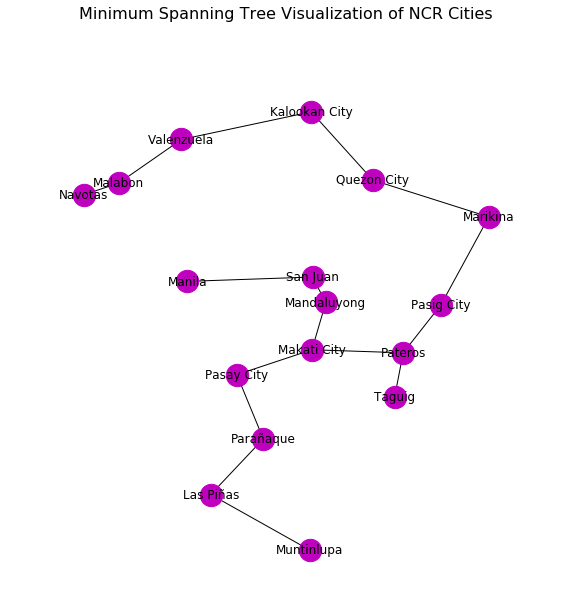

In [ ]:
mst_graph = nx.Graph()
mst_graph.add_nodes_from(cities)
mst_graph.add_edges_from(mst_list)

plt.figure(figsize=(10,10))
nx.draw_networkx(mst_graph, with_labels=True, 
                 pos=position, node_size=500, node_color='m')
plt.axis('off')
plt.title('Minimum Spanning Tree Visualization of NCR Cities\n\n', fontsize=16)
plt.show()

In [ ]:
# calculating the minimum spanning tree
total = 0
for road in mst_list:
    total += distance[road]
print("The minimum spanning tree of the network is " + str(total) + " meters.")

The minimum spanning tree of the network is 74824.7396504893 meters.


## Directed Graphs

Recall that directed graphs are graphs where the edges have an associated direction with them.

To construct a directed graph, we use nx.DiGraph().

In [ ]:
new_graph = nx.DiGraph()

We add nodes in the same manner as undirected graphs.

In [ ]:
# add multiple nodes
cities = list(ncr_gdf['city'])
new_graph.add_nodes_from(cities)

We add edges in the same manner as undirected graphs. However, the order of the tuple matters when adding edges in the case of directed graphs. When adding edges in a tuple, make sure that the tuple follows a (source, destination) order.

Suppose that we would like to find the optimal path to travel from `Quezon City` to `Las Pinas`. We first construct a new graph containing the bi-directional edges of all border sharing cities.

In [ ]:
directed_roads = []

for city, neighbors in list(zip(ncr_gdf['city'], ncr_gdf['neighbors'])):
    neighbors_list = neighbors.split(',')
    for neighbor in neighbors_list:
        directed_roads.append((city, neighbor))   
        
directed_roads

[('Pateros', 'Makati City'),
 ('Pateros', 'Pasig City'),
 ('Pateros', 'Taguig'),
 ('Quezon City', 'Mandaluyong'),
 ('Quezon City', 'Manila'),
 ('Quezon City', 'Marikina'),
 ('Quezon City', 'Kalookan City'),
 ('Quezon City', 'Pasig City'),
 ('Quezon City', 'San Juan'),
 ('Quezon City', 'Valenzuela'),
 ('Mandaluyong', 'Quezon City'),
 ('Mandaluyong', 'Manila'),
 ('Mandaluyong', 'Makati City'),
 ('Mandaluyong', 'Pasig City'),
 ('Mandaluyong', 'San Juan'),
 ('Manila', 'Quezon City'),
 ('Manila', 'Mandaluyong'),
 ('Manila', 'Kalookan City'),
 ('Manila', 'Makati City'),
 ('Manila', 'Navotas'),
 ('Manila', 'Pasay City'),
 ('Manila', 'San Juan'),
 ('Marikina', 'Quezon City'),
 ('Marikina', 'Pasig City'),
 ('Muntinlupa', 'Las Piñas'),
 ('Muntinlupa', 'Parañaque'),
 ('Muntinlupa', 'Taguig'),
 ('Kalookan City', 'Quezon City'),
 ('Kalookan City', 'Manila'),
 ('Kalookan City', 'Malabon'),
 ('Kalookan City', 'Navotas'),
 ('Kalookan City', 'Valenzuela'),
 ('Las Piñas', 'Muntinlupa'),
 ('Las Piñas', '

Let us plot the directed graph, but this time let us overlay this diagram on the NCR map.

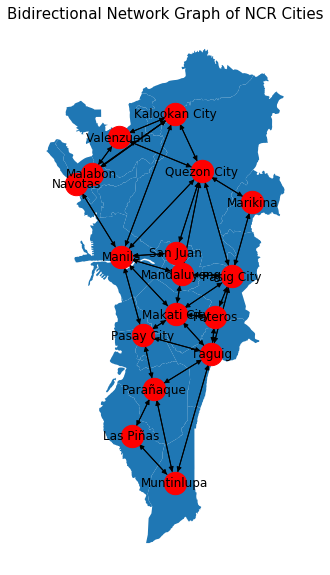

In [ ]:
new_graph.add_edges_from(directed_roads) # add edges to connect nodes

fig, ax = plt.subplots(figsize=(20,10))
ncr_gdf[['city', 'geometry']].plot(ax=ax)
nx.draw_networkx(new_graph, with_labels=True, pos=position, 
                 node_size=500, node_color='r')
ax.axis('off')
ax.set_title('Bidirectional Network Graph of NCR Cities', fontsize=15)
plt.show()

Let us now assign the weights for each edge by adding the corresponding distances between the centroids.

In [ ]:
new_distance = {}
for road in directed_roads:
    # transform to EPSG 3123
    source = road[0]
    destination = road[1]
    x1, y1 = proj.transform(Point(position[source]).x, 
                            Point(position[source]).y)
    x2, y2 = proj.transform(Point(position[destination]).x, 
                            Point(position[destination]).y)
    
    # calculate distance and assign it as the weight
    new_graph[source][destination]['weight'] = Point(x1, y1).distance(Point(x2, y2))
    new_distance[road] = Point(x1, y1).distance(Point(x2, y2))

Having our directed network prepared, we can now calculate the <b>shortest path</b> to travel from `Quezon City` to `Las Pinas`. To do this, we use <b> Dijkstra's algorithm. </b>For a given source node in the graph, the algorithm finds the shortest path between that node and every other. It can also be used for finding the shortest paths from a single node to a single destination node by stopping the algorithm once the shortest path to the destination node has been determined.

In [ ]:
shortest_path = nx.dijkstra_path(new_graph, source='Quezon City', 
                                 target='Las Piñas')
print(list(shortest_path))

['Quezon City', 'Mandaluyong', 'Makati City', 'Pasay City', 'Parañaque', 'Las Piñas']


In [ ]:
# form a list of tuples containing all the edges of the shortest path
paths = []
for i in range(len(shortest_path)-1):
    paths.append((list(shortest_path)[i], list(shortest_path)[i+1]))
    
paths

[('Quezon City', 'Mandaluyong'),
 ('Mandaluyong', 'Makati City'),
 ('Makati City', 'Pasay City'),
 ('Pasay City', 'Parañaque'),
 ('Parañaque', 'Las Piñas')]

We can visualize the shortest path below.

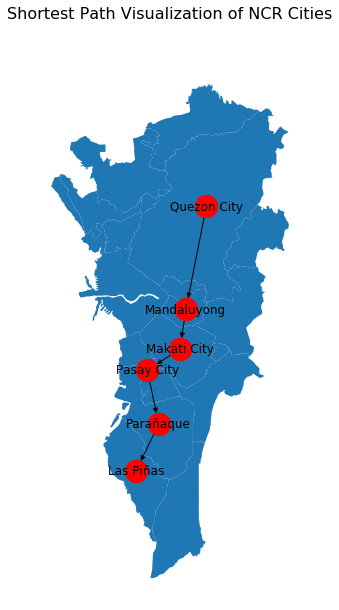

In [ ]:
shortest_path_graph = nx.DiGraph()
shortest_path_graph.add_nodes_from(list(shortest_path))
shortest_path_graph.add_edges_from(paths)

fig, ax = plt.subplots(figsize=(10,10))
ncr_gdf[['city', 'geometry']].plot(ax=ax)
nx.draw_networkx(shortest_path_graph, with_labels=True, 
                 pos=position, node_size=500, node_color='red', ax=ax)
ax.axis('off')
ax.set_title('Shortest Path Visualization of NCR Cities\n\n', fontsize=16)
plt.show()

Likewise, we can also calculate how long is the shortest path through the `dijkstra_path_length` function of NetworkX.

In [ ]:
path_length = nx.dijkstra_path_length(new_graph, source='Quezon City',
                                      target='Las Piñas')
print("The shortest path from Quezon City to Las Piñas is " +
      str(round(path_length, 2)) + ' meters long.')

The shortest path from Quezon City to Las Piñas is 28213.04 meters long.


## Degrees of Directed Graphs

We can also calculate the degrees of a directed graph, which distinguishes between outbound and inbound connection.

The <b> indegree </b> of a node is the number of edges which are coming into the node.

The <b> outdegree </b> of node is the number of edges which are going out from the node.

To illustrate this, we explore a new use case -- email network correspondence. We visualize the DataFrame containing exchange of emails between different employees, and identify which employee tends to send and receive the most number of emails from `unique` employees.

It is expected that you can see how this quantitative method be applied to your own location strategy use cases.

In [ ]:
emails = pd.read_csv('/content/gdrive/My Drive/GSA/email.csv', index_col=0)
emails

,From,To,Count
0,0,1,18
1,0,2,0
2,0,3,0
3,0,4,0
4,0,5,0
...,...,...,...
7827,89,84,0
7828,89,85,1
7829,89,86,0
7830,89,87,0


We can use traditional pandas methods to identify who has received the most number of emails and who has sent the most number of emails.

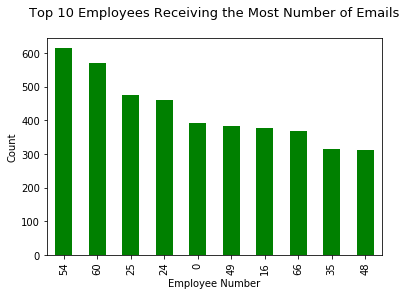

In [ ]:
# received the most number of emails

num_received_emails = emails[['To', 'Count']].groupby('To')['Count'].sum()
num_received_emails.sort_values(ascending=False)[:10].plot(kind='bar', 
                                                           color='green')
plt.title('Top 10 Employees Receiving the Most Number of Emails\n',
          fontsize=13)
plt.xlabel('Employee Number')
plt.ylabel('Count')
plt.show()

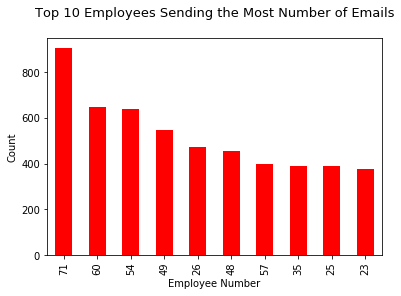

In [ ]:
# sent the most number of emails

num_sent_emails = emails[['From', 'Count']].groupby('From')['Count'].sum()
num_sent_emails.sort_values(ascending=False)[:10].plot(kind='bar', 
                                                       color='red')
plt.title('Top 10 Employees Sending the Most Number of Emails\n',
          fontsize=13)
plt.xlabel('Employee Number')
plt.ylabel('Count')
plt.show()

Now, suppose we want to identify the employee who has the most number of other employees interacted with via email. For this, the `indegree` and the `outdegree` metrics are useful.

To know which employee sent the most to unique employees, we can find the `outdegree`. Notice in the DataFrame above, `employee 0` has not sent at least one email to `employee 2` hence there is no directed arrow that connects `employee 0` to `employee 2`.

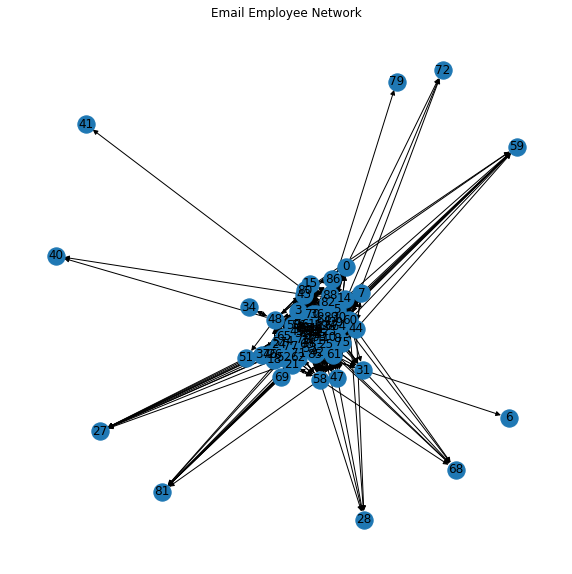

In [ ]:
em = nx.DiGraph()
newList = []

for idx, row in emails.iterrows():
    if row['Count'] != 0:
        em.add_weighted_edges_from([(row['From'], row['To'], row['Count'])], 
                                   weight="Count")
    
plt.figure(figsize=(10,10))
nx.draw_networkx(em, with_labels=True)
plt.title('Email Employee Network')
plt.axis('off')
plt.show()

To find the `outdegree` of all the nodes in the network, we can use the `out_degree` method.

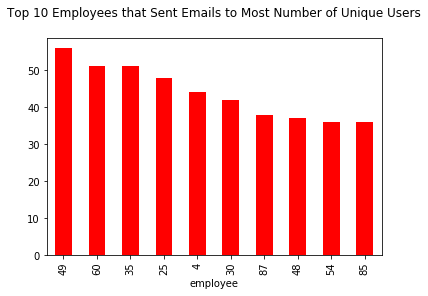

In [ ]:
outdegree = pd.DataFrame(em.out_degree(), columns=['employee', 'outdegree'])
result_outdegree = outdegree.sort_values(by='outdegree', ascending=False)[:10]
result_outdegree = result_outdegree.set_index('employee')
result_outdegree.plot(kind='bar', color='red', legend=False)
plt.title('Top 10 Employees that Sent Emails to Most Number of Unique Users\n')
plt.show()

Although `employee 71` sent the most number of emails, he/she was not at the top 10 in terms of the number of unique employees communicated via email. On the other hand, `employee 49` was the fourth in terms of the most number of emails sent but is the first in terms of the number of unique employees communicated via email.

To identify the employees that received at least one email to the most number of unique users, we can calculate the `indegree` of a network. To do this, we can use the `in_degree()` method of `NetworkX`.

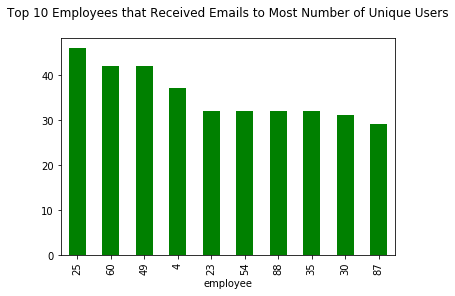

In [ ]:
indegree = pd.DataFrame(em.in_degree(), columns=['employee', 'indegree'])
result_indegree = indegree.sort_values(by='indegree', ascending=False)[:10]
result_indegree = result_indegree.set_index('employee')
result_indegree.plot(kind='bar', color='green', legend=False)
plt.title('Top 10 Employees that Received Emails to Most Number of Unique Users\n')
plt.show()

Although `employee 25` is not in the top 10 in terms of most received emails, he/she is the employee that corresponds to the most number of other employees in the entire network.

For more information about the NetworkX library, you may access its documentation at https://networkx.github.io/documentation/stable/reference/index.html.